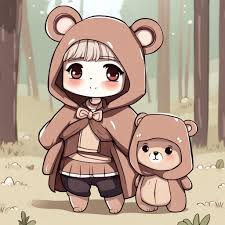

Image Size: 151875 pixels
Image Shape: (225, 225, 3) (Height, Width, Channels)


In [1]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/Murtha.jpeg')
cv2_imshow(image)
height, width, channels = image.shape
print(f"Image Size: {image.size} pixels")
print(f"Image Shape: {image.shape} (Height, Width, Channels)")

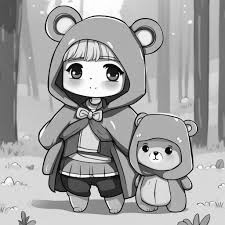

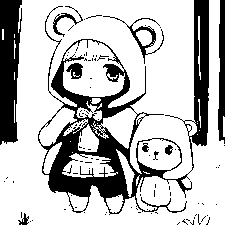

In [2]:
def convert_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("gray_image.jpg", gray_image)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    cv2_imshow(gray_image)
    print()
    cv2_imshow(binary_image)
convert_image(image)

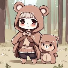

In [3]:
newImg=cv2.resize(image,(0,0),fy=0.3,fx=0.3)
cv2_imshow(newImg)

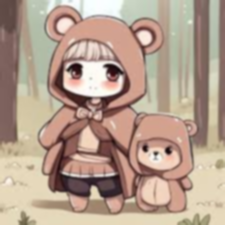

In [4]:
def denoise_image(image):
    # Apply Gaussian Blur to remove noise
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    cv2_imshow(denoised_image)
denoise_image(image)

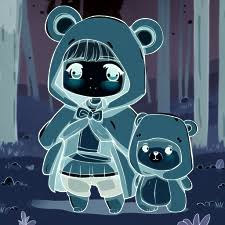

In [5]:
def inverse_transform(image):
    # Perform inverse transformation (negative image)
    inverted_image = cv2.bitwise_not(image)

    # Save the inverted image
    cv2.imwrite("inverted_image.jpg", inverted_image)
    cv2_imshow(inverted_image)
inverse_transform(image)

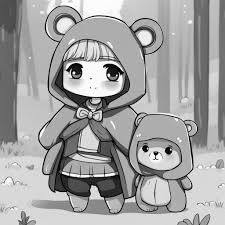

In [6]:
import numpy as np
def contrast_stretch(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get min and max pixel values
    min_val = np.min(gray)
    max_val = np.max(gray)

    # Apply contrast stretching
    stretched = (gray - min_val) * (255 / (max_val - min_val))
    stretched = np.clip(stretched, 0, 255).astype(np.uint8)

    # Save the enhanced image
    cv2.imwrite("contrast_stretched.jpg", stretched)
    cv2_imshow(stretched)
contrast_stretch(image)


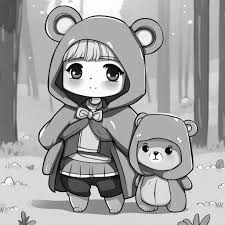

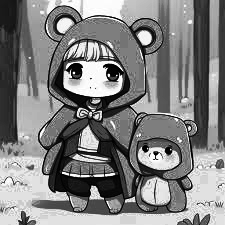

In [7]:
gray=cv2.imread('/content/Murtha.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(gray)

# Display the original and equalized images
cv2_imshow(gray)
print()
cv2_imshow(equalized_image)


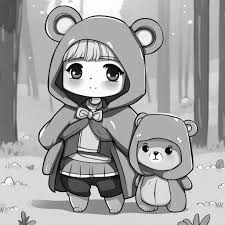

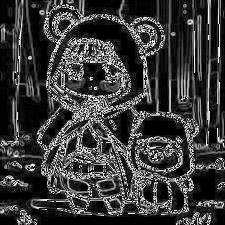

In [8]:
# Apply Sobel operator in the x direction
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel operator in the y direction
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of gradients
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Convert the result to an 8-bit image
sobel_magnitude = np.uint8(np.absolute(sobel_magnitude))

# Display the original and Sobel edge-detected images
cv2_imshow(gray)
print()
cv2_imshow( sobel_magnitude)
